<a href="https://colab.research.google.com/github/karthikdoguparthi/Medical-Appointment-No-Shows/blob/main/EL_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Data Cleaning and Preprocessing
Objective: Clean and prepare a raw dataset (with nulls, duplicates, inconsistent formats).


Tools: Excel / Python (Pandas)

# Dataset Name : Medical Appointment No Shows

In [1]:
#Import Libraries

import pandas as pd
import unidecode as uc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read dataset
dataset = pd.read_csv('/content/rawdata.csv')

In [3]:
#dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#describing dataset
dataset.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#viewing data from dataset
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#checking any null values
print(dataset.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [7]:
#checking the age
print(dataset[dataset['Age'] == 0])

           PatientId  AppointmentID Gender          ScheduledDay  \
59      7.184428e+13        5638545      F  2016-04-29T08:08:43Z   
63      2.366233e+14        5628286      M  2016-04-27T10:46:12Z   
64      1.885174e+14        5616082      M  2016-04-25T13:28:21Z   
65      2.718818e+14        5628321      M  2016-04-27T10:48:50Z   
67      8.647128e+13        5639264      F  2016-04-29T08:53:02Z   
...              ...            ...    ...                   ...   
110345  1.473952e+14        5702537      F  2016-05-16T12:30:58Z   
110346  5.577525e+12        5777724      M  2016-06-06T14:22:34Z   
110454  6.142460e+11        5772400      F  2016-06-03T15:18:44Z   
110460  4.321846e+13        5769545      F  2016-06-03T08:56:51Z   
110507  4.769462e+14        5786918      F  2016-06-08T09:04:18Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
59      2016-04-29T00:00:00Z    0          CONQUISTA            0   
63      2016-04-29T00:00:00Z    0       SÃO B

In [8]:
#checking the age -1
print(dataset[dataset['Age'] == -1])

          PatientId  AppointmentID Gender          ScheduledDay  \
99832  4.659432e+14        5775010      F  2016-06-06T08:58:13Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
99832  2016-06-06T00:00:00Z   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832         0           0        0             0      No  


In [9]:
# changing -1 age to mean of the column
dataset['Age'] = dataset['Age'].replace(-1,dataset.loc[dataset['Age']!=-1, 'Age'].mean()).astype(int)

In [10]:
# Compute mean ages for each gender (excluding age 0)
mean_age_m = dataset.loc[(dataset['Gender'] == 'M') & (dataset['Age'] != 0), 'Age'].mean()
mean_age_f = dataset.loc[(dataset['Gender'] == 'F') & (dataset['Age'] != 0), 'Age'].mean()

# Replace 0 age with gender specific mean
dataset.loc[(dataset['Gender'] == 'M') & (dataset['Age'] == 0), 'Age'] = mean_age_m
dataset.loc[(dataset['Gender'] == 'F') & (dataset['Age'] == 0), 'Age'] = mean_age_f

# Convert Age column to integer
dataset['Age'] = dataset['Age'].astype(int)

/tmp/ipython-input-3825741360.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '35.40041769508259' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[(dataset['Gender'] == 'M') & (dataset['Age'] == 0), 'Age'] = mean_age_m


In [11]:
print(dataset[['Age']])

        Age
0        62
1        56
2        62
3         8
4        56
...     ...
110522   56
110523   51
110524   21
110525   38
110526   54

[110527 rows x 1 columns]


In [12]:
#check one of rows with Age 0
print(dataset.loc[dataset['AppointmentID'] == 5638545, 'Age'])

59    39
Name: Age, dtype: int64


In [13]:
#check row with Age -1
print(dataset.loc[dataset['AppointmentID'] == 5775010, 'Age'])

99832    37
Name: Age, dtype: int64


In [14]:
# change language of Neighbourhood colomn to standard english
dataset['Neighbourhood'] = dataset['Neighbourhood'].apply(lambda x: uc.unidecode(x).capitalize())

In [15]:
print(dataset[['Neighbourhood']])

            Neighbourhood
0         Jardim da penha
1         Jardim da penha
2           Mata da praia
3       Pontal de camburi
4         Jardim da penha
...                   ...
110522        Maria ortiz
110523        Maria ortiz
110524        Maria ortiz
110525        Maria ortiz
110526        Maria ortiz

[110527 rows x 1 columns]


In [16]:
#changing datatype of ScheduledDay and AppointmentDay to DateTime
dataset['ScheduledDay'] = pd.to_datetime(dataset['ScheduledDay']).dt.tz_localize(None)
dataset['AppointmentDay'] = pd.to_datetime(dataset['AppointmentDay']).dt.tz_localize(None)

In [17]:
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,Jardim da penha,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,Jardim da penha,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,Mata da praia,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,Pontal de camburi,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,Jardim da penha,0,1,1,0,0,0,No


In [18]:
# Split into date and time
dataset['ScheduledDate'] = dataset['ScheduledDay'].dt.date
dataset['ScheduledTime'] = dataset['ScheduledDay'].dt.time

dataset['AppointmentDate'] = dataset['AppointmentDay'].dt.date
dataset['AppointmentTime'] = dataset['AppointmentDay'].dt.time

In [19]:
print(dataset[['ScheduledDate', 'ScheduledTime', 'AppointmentDate','AppointmentTime']])

       ScheduledDate ScheduledTime AppointmentDate AppointmentTime
0         2016-04-29      18:38:08      2016-04-29        00:00:00
1         2016-04-29      16:08:27      2016-04-29        00:00:00
2         2016-04-29      16:19:04      2016-04-29        00:00:00
3         2016-04-29      17:29:31      2016-04-29        00:00:00
4         2016-04-29      16:07:23      2016-04-29        00:00:00
...              ...           ...             ...             ...
110522    2016-05-03      09:15:35      2016-06-07        00:00:00
110523    2016-05-03      07:27:33      2016-06-07        00:00:00
110524    2016-04-27      16:03:52      2016-06-07        00:00:00
110525    2016-04-27      15:09:23      2016-06-07        00:00:00
110526    2016-04-27      13:30:56      2016-06-07        00:00:00

[110527 rows x 4 columns]


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PatientId        110527 non-null  float64       
 1   AppointmentID    110527 non-null  int64         
 2   Gender           110527 non-null  object        
 3   ScheduledDay     110527 non-null  datetime64[ns]
 4   AppointmentDay   110527 non-null  datetime64[ns]
 5   Age              110527 non-null  int64         
 6   Neighbourhood    110527 non-null  object        
 7   Scholarship      110527 non-null  int64         
 8   Hipertension     110527 non-null  int64         
 9   Diabetes         110527 non-null  int64         
 10  Alcoholism       110527 non-null  int64         
 11  Handcap          110527 non-null  int64         
 12  SMS_received     110527 non-null  int64         
 13  No-show          110527 non-null  object        
 14  ScheduledDate    110

In [21]:
#dropping unwanted columns
dataset.drop(['ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

In [22]:
dataset.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,ScheduledTime,AppointmentDate,AppointmentTime
0,2.987250e+13,5642903,F,62,Jardim da penha,0,1,0,0,0,0,No,2016-04-29,18:38:08,2016-04-29,00:00:00
1,5.589978e+14,5642503,M,56,Jardim da penha,0,0,0,0,0,0,No,2016-04-29,16:08:27,2016-04-29,00:00:00
2,4.262962e+12,5642549,F,62,Mata da praia,0,0,0,0,0,0,No,2016-04-29,16:19:04,2016-04-29,00:00:00
3,8.679512e+11,5642828,F,8,Pontal de camburi,0,0,0,0,0,0,No,2016-04-29,17:29:31,2016-04-29,00:00:00
4,8.841186e+12,5642494,F,56,Jardim da penha,0,1,1,0,0,0,No,2016-04-29,16:07:23,2016-04-29,00:00:00


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PatientId        110527 non-null  float64
 1   AppointmentID    110527 non-null  int64  
 2   Gender           110527 non-null  object 
 3   Age              110527 non-null  int64  
 4   Neighbourhood    110527 non-null  object 
 5   Scholarship      110527 non-null  int64  
 6   Hipertension     110527 non-null  int64  
 7   Diabetes         110527 non-null  int64  
 8   Alcoholism       110527 non-null  int64  
 9   Handcap          110527 non-null  int64  
 10  SMS_received     110527 non-null  int64  
 11  No-show          110527 non-null  object 
 12  ScheduledDate    110527 non-null  object 
 13  ScheduledTime    110527 non-null  object 
 14  AppointmentDate  110527 non-null  object 
 15  AppointmentTime  110527 non-null  object 
dtypes: float64(1), int64(8), object(7)
mem

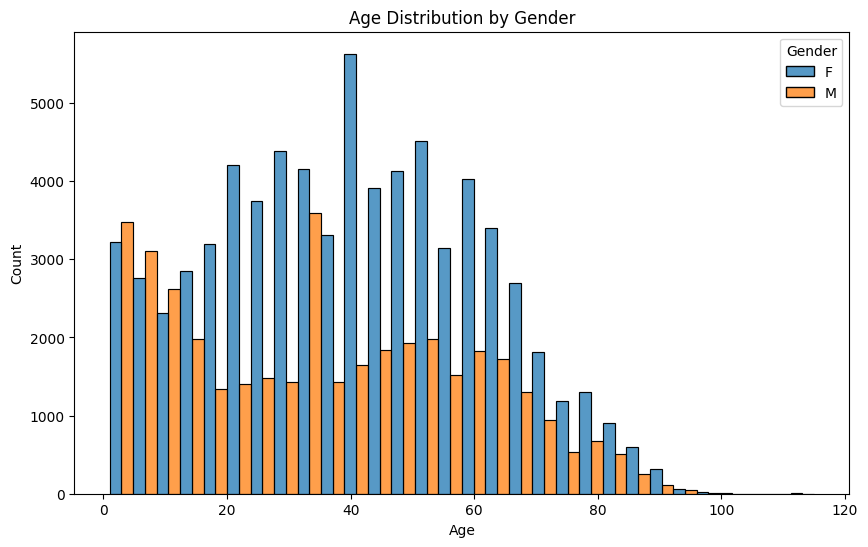

In [24]:
# Age Distribution by Gender
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Age', hue='Gender', multiple='dodge', bins=30)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.show()

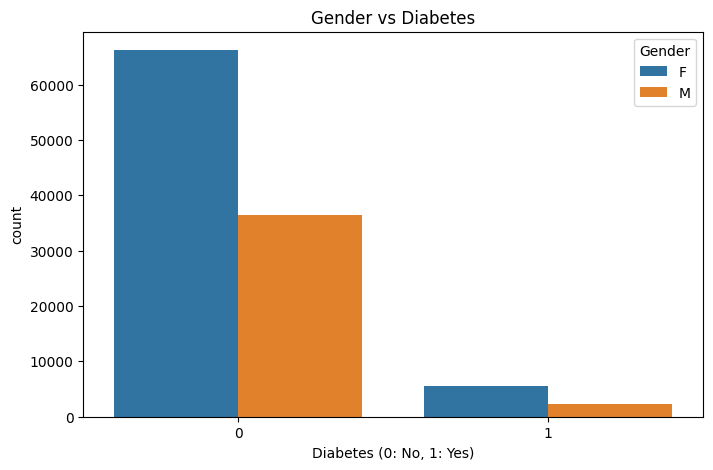

In [25]:
# Gender vs Diabetes
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='Diabetes', hue='Gender')
plt.title('Gender vs Diabetes')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.show()

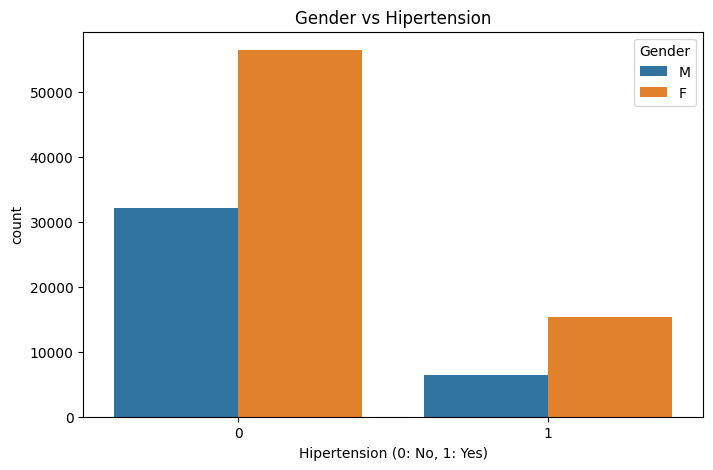

In [26]:
# Gender vs Hipertension
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='Hipertension', hue='Gender')
plt.title('Gender vs Hipertension')
plt.xlabel('Hipertension (0: No, 1: Yes)')
plt.show()

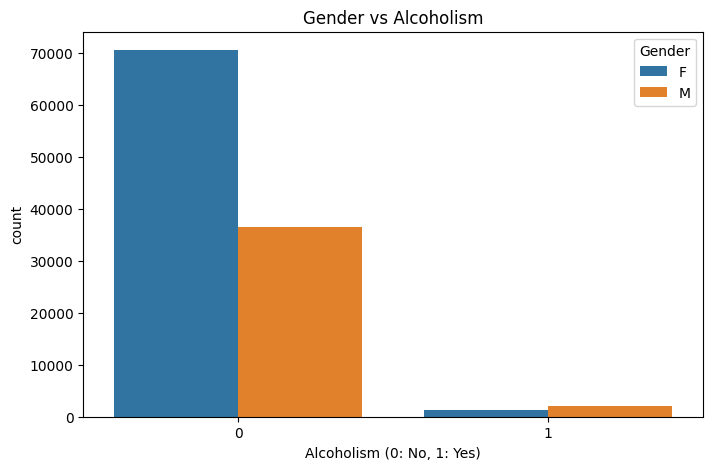

In [27]:
# Gender vs Alcoholism
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='Alcoholism', hue='Gender')
plt.title('Gender vs Alcoholism')
plt.xlabel('Alcoholism (0: No, 1: Yes)')
plt.show()

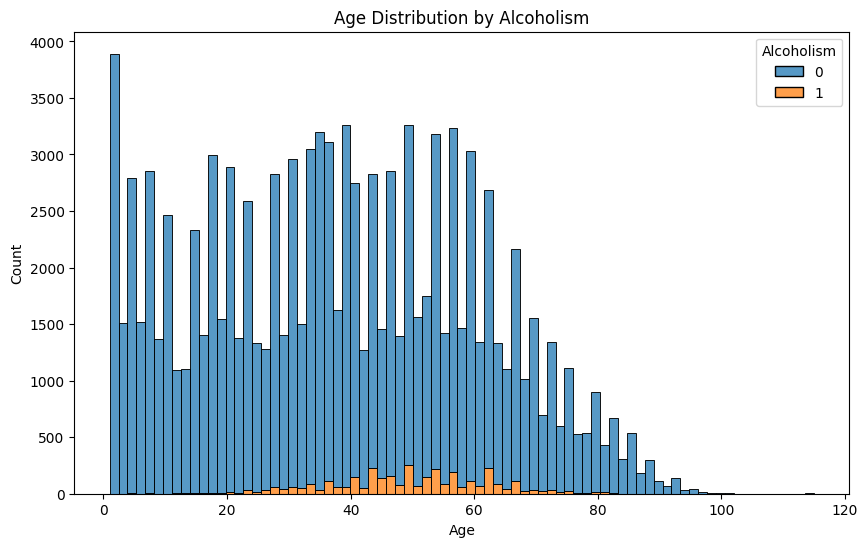

In [28]:
#Age vs Alcoholism
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Age', hue='Alcoholism', multiple='stack')
plt.title('Age Distribution by Alcoholism')
plt.xlabel('Age')
plt.show()

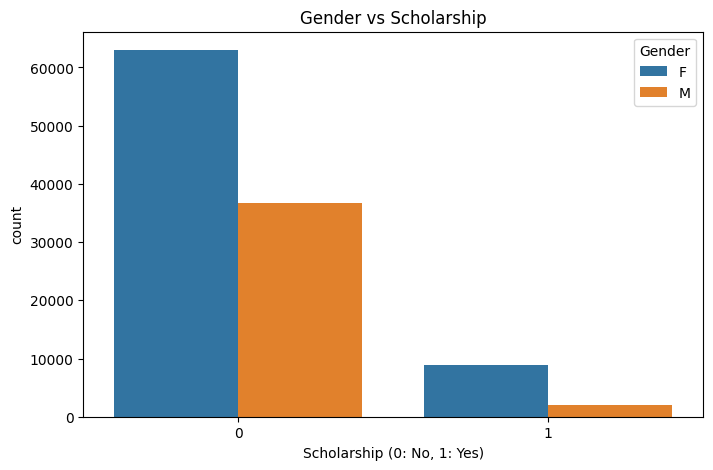

In [29]:
# Gender vs Scholarship
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='Scholarship', hue='Gender')
plt.title('Gender vs Scholarship')
plt.xlabel('Scholarship (0: No, 1: Yes)')
plt.show()

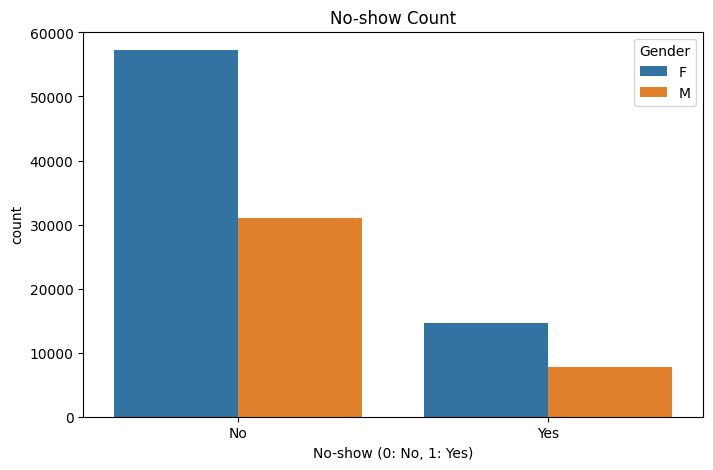

In [30]:
#No show vs Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='No-show', hue = 'Gender')
plt.title('No-show Count')
plt.xlabel('No-show (0: No, 1: Yes)')
plt.show()